In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use("ggplot")
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("dcd167.csv",encoding="utf-8")
df.head()

,品牌,版本,车龄,里程,城市,售价,原价,链接
0,雷克萨斯,300e 纯·悦,2020,2.95万公里,郑州,9.35万,36.20万,https://p3-dcd.byteimg.com/motor.sh.image/exte...
1,蔚来,100kWh 首发版,2021,4.40万公里,南京,15.30万,53.60万,https://p3-dcd-sign.byteimg.com/tos-cn-i-f042m...
2,Jeep,200T 自动家享版,2017,10.60万公里,东莞,3.68万,17.98万,https://p3-dcd-sign.byteimg.com/tos-cn-i-f042m...
3,比亚迪,宋EV300 尊贵型,2017,7.81万公里,北京,3.48万,27.59万,https://p3-dcd.byteimg.com/motor.sh.image/exte...
4,东风风光,糖果款 半糖,2022,0.20万公里,杭州,1.88万,4.96万,https://p3-dcd-sign.byteimg.com/tos-cn-i-f042m...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   品牌      9995 non-null   object
 1   版本      9995 non-null   object
 2   车龄      9995 non-null   int64 
 3   里程      9890 non-null   object
 4   城市      9962 non-null   object
 5   售价      9995 non-null   object
 6   原价      9995 non-null   object
 7   链接      9995 non-null   object
dtypes: int64(1), object(7)
memory usage: 624.8+ KB


In [4]:
df.isnull().sum()

品牌      0
版本      0
车龄      0
里程    105
城市     33
售价      0
原价      0
链接      0
dtype: int64

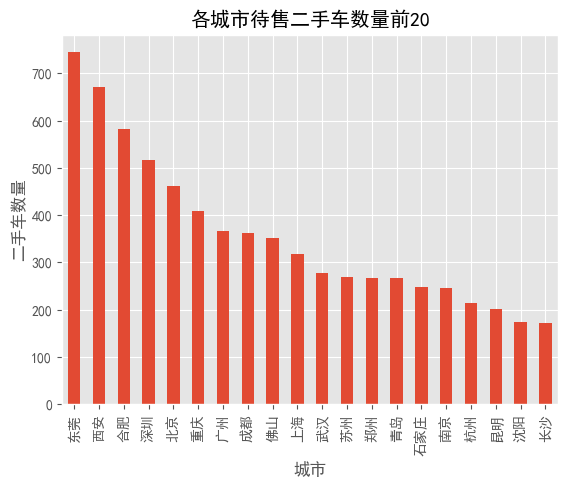

In [5]:
#城市待售二手车前20
counts = df["城市"].value_counts().sort_values(ascending=False)[:20]# 降序排序
counts.plot(kind="bar")
plt.ylabel("二手车数量")
plt.title("各城市待售二手车数量前20")
plt.savefig('各城市待售二手车前20.png')

In [6]:
# 处理售价中的“万”，转换为数值
df["售价"] = df["售价"].astype(str)
df["售价"] = df["售价"].str.replace('万', '').astype(float)

# 分组求平均
result = df.groupby("城市")["售价"].mean().round(2)#保留小数点后两位



Text(0.5, 1.0, '各城市二手车售价平均值前20')

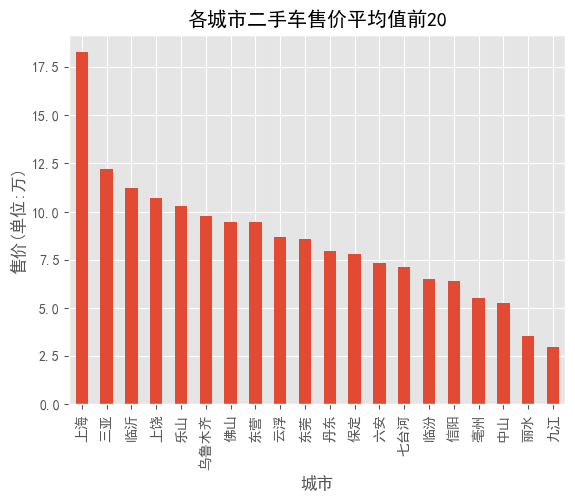

In [7]:
#各城市售价平均值前20
result[:20].sort_values(ascending=False).plot(kind="bar")
plt.ylabel('售价(单位:万)')
plt.title('各城市二手车售价平均值前20')

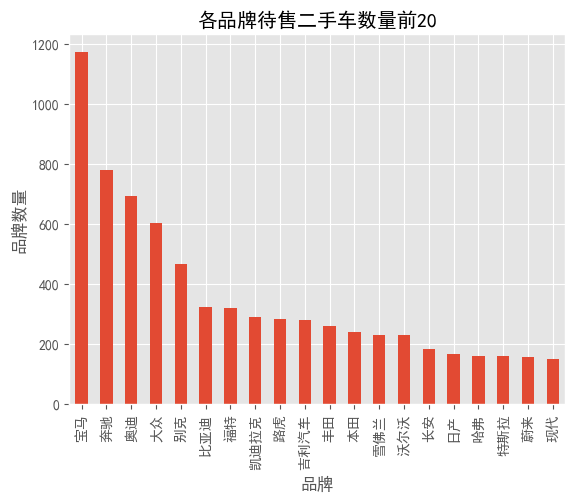

In [8]:
#各品牌待售二手车数量前20
counts = df["品牌"].value_counts().sort_values(ascending=False)[:20]# 降序排序
counts.plot(kind="bar")
plt.ylabel("品牌数量")
plt.title("各品牌待售二手车数量前20")
plt.savefig('各品牌待售二手车数量前20')

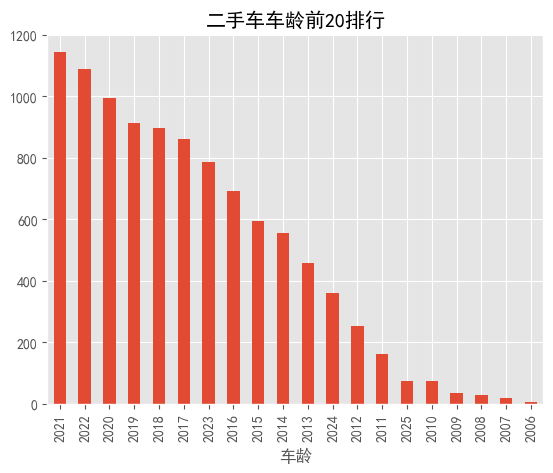

In [9]:
#二手车车龄前20排行
df["车龄"] = df["车龄"].astype(int)
df["车龄"].value_counts().sort_values(ascending=False).iloc[:20].plot(kind="bar")
plt.title("二手车车龄前20排行")
plt.savefig('二手车车龄前20排行')

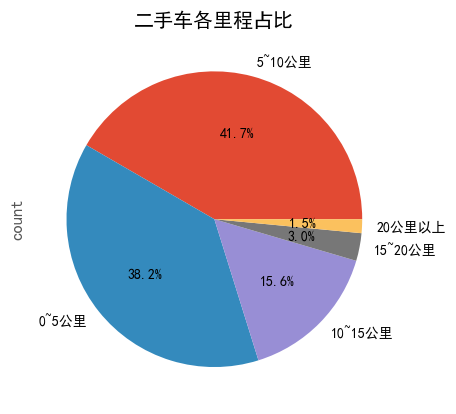

In [10]:
#二手车各里程占比饼图
def kilometers(x) : #划分各个区间
    if x <= 5:
        return "0~5公里"
    elif 5<x<=10:
        return "5~10公里"
    elif 10<x<=15:
        return "10~15公里"
    elif 15<x<=20:
        return "15~20公里"
    else:
         return "20公里以上"

df["里程分级"]=df["里程"].str.replace('万公里', '').astype(float).apply(lambda x:kilometers(x) )
df["里程分级"].value_counts().plot.pie(autopct= "%1.1f%%")
plt.title("二手车各里程占比")
plt.savefig('二手车各里程占比')   

In [11]:
df["里程(万公里)"] = df["里程"].str.replace("万公里","").astype("float")
df.rename(columns={'售价': '售价(万元)'}, inplace=True)#将 列名 "售价" 修改为 "售价 (万元)"

In [12]:
# #二手车查询工具
# keyword = input("请输入品牌:")
# data5 =df.loc[df["品牌"].str.contains(str(keyword))]
# keyword1 = float(input("请输入里程(万公里)上限:"))
# data6 = data5[data5["里程(万公里)"]<= keyword1]
# city = input("请输入城市:")
# data7 = data6[data6["城市"]==str(city)]
# day1 = float(input("请输入售价(万元)下限"))
# day2 = float(input("请输入售价(万元)上限"))
# data8 = data7[(data7["售价(万元)"]>=day1)&(data7["售价(万元)"]<=day2)]
# data8

In [1]:
import os  
print(os.getcwd())  # 打印当前工作目录的绝对路径

C:\Users\a


In [5]:
import os  
os.chdir(r"H:\懂车帝二手车数据分析")  # 切换到目标文件夹（路径用 raw 字符串，避免转义）
print(os.getcwd()) 

H:\懂车帝二手车数据分析
